## Principal component analysis for the dataset

A notebook for principal component analysis process that we will use for clustering.

In [3]:
pip install scikit-learn scipy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 11.9 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.decomposition import PCA

data = pd.read_excel('../Data/grades.xlsx', header = [0, 1]) # load dataset defining the headers
data.columns = [' '.join(col).strip() for col in data.columns.values]
data.replace('-', np.nan, inplace = True) # wrong values to be numeric
data.replace(-1, np.nan, inplace = True)
data.fillna(0, inplace = True)
data = data.loc[:, (data != 0).any(axis = 0)]

z_data = stats.zscore(data)
covariance_matrix = z_data.cov() # Calculate the covariance matrix of the data
print(f'Covariance matrix:\n {covariance_matrix}')

eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix) # Calculate the eigenvalues and eigenvectors of the covariance matrix
idx = eigenvalues.argsort()[::-1] # Sort the eigenvalues in descending order
eigenvalues = eigenvalues[idx] # Rearrange the eigenvalues
print(f"Eigenvalues:\n {eigenvalues}")

eigenvectors = eigenvectors[:, idx] # Rearrange the eigenvectors
explained_variance = np.cumsum(eigenvalues) / np.sum(eigenvalues) # Calculate the explained variance
print("Explained variance:\n", explained_variance) # Print the explained variance

percentage = 0.95
n_components = np.argmax(explained_variance > percentage) + 1 # Find the number of components that explain at least 95% of the variance
pca = PCA(n_components = n_components) # Create a PCA object with the number of components
pca.fit(z_data) # Fit the PCA object to the data
transformed_data = pca.transform(z_data) # Transform the data using the PCA object
transformed_data_df = pd.DataFrame(transformed_data, columns = ['PC{}'.format(i + 1) for i in range(n_components)]) # Convert the transformed data to a DataFrame
print(transformed_data_df.head(10)) # Print the transformed data

pc_values = np.arange(pca.n_components_) + 1 # Create an array of the principal component values
print(f"Number of components needed for 95% variance: {n_components}")

Covariance matrix:
                          Exams Final  Exams Repeat  Homework Assignments 1  \
Exams Final                 1.006329     -0.248032                0.511672   
Exams Repeat               -0.248032      1.006329               -0.042280   
Homework Assignments 1      0.511672     -0.042280                1.006329   
Homework Assignments 2      0.509904     -0.017764                0.810638   
Homework Assignments 3      0.491965      0.145370                0.700314   
Homework Assignments 4      0.260499      0.062015                0.199062   
Compulsory Activities 1     0.487009     -0.046559                0.474370   
Compulsory Activities 2     0.452804     -0.061378                0.570043   
Compulsory Activities 3     0.495405     -0.029265                0.574980   
Compulsory Activities 4     0.474365      0.058821                0.568751   
Compulsory Activities 5     0.450370      0.052559                0.501446   
Compulsory Activities 6     0.365698      0.

/tmp/ipykernel_3135301/3608652772.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace('-', np.nan, inplace = True) # wrong values to be numeric


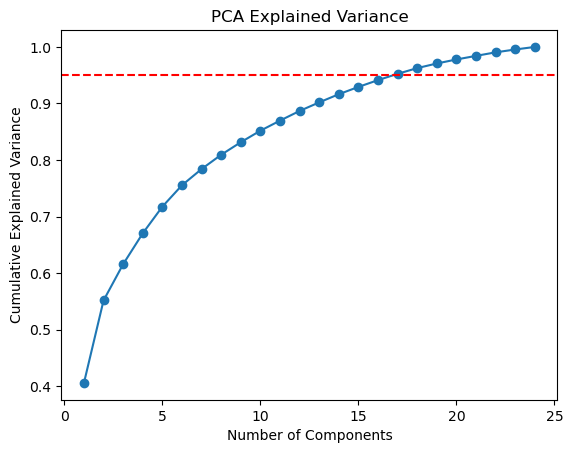

In [3]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker = "o")
plt.axhline(y = 0.95, color = "r", linestyle = "--")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA Explained Variance")
plt.show()

## Principal component analysis for the avg dataset

The same process for the Average dataset and see the differences

In [6]:
avg_data = pd.DataFrame()
avg_data["Homework Avg"] = data[[f"Homework Assignments {i}" for i in range(1, 5)]].mean(axis = 1)
avg_data["Compulsory Activities Avg"] = data[[f"Compulsory Activities {i}" for i in range(1, 9)]].mean(axis = 1)
avg_data["Optional Activities Avg"] = data[[f"Optional Activities {i}" for i in range(1, 11)]].mean(axis = 1)
avg_data["Final Exam"] = data[['Exams Final', 'Exams Repeat']].max(axis = 1)

z_data = stats.zscore(avg_data)
covariance_matrix = z_data.cov() # Calculate the covariance matrix of the data
print(f'Covariance matrix:\n {covariance_matrix}')

eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix) # Calculate the eigenvalues and eigenvectors of the covariance matrix
idx = eigenvalues.argsort()[::-1] # Sort the eigenvalues in descending order
eigenvalues = eigenvalues[idx] # Rearrange the eigenvalues
print(f"Eigenvalues:\n {eigenvalues}")

eigenvectors = eigenvectors[:, idx] # Rearrange the eigenvectors
explained_variance = np.cumsum(eigenvalues) / np.sum(eigenvalues) # Calculate the explained variance
print("Explained variance:\n", explained_variance) # Print the explained variance

percentage = 0.95
n_components = np.argmax(explained_variance > percentage) + 1 # Find the number of components that explain at least 95% of the variance
pca = PCA(n_components = n_components) # Create a PCA object with the number of components
pca.fit(z_data) # Fit the PCA object to the data
transformed_data = pca.transform(z_data) # Transform the data using the PCA object
transformed_data_df = pd.DataFrame(transformed_data, columns = ['PC{}'.format(i + 1) for i in range(n_components)]) # Convert the transformed data to a DataFrame
print(transformed_data_df.head(10)) # Print the transformed data

pc_values = np.arange(pca.n_components_) + 1 # Create an array of the principal component values
print(f"Number of components needed for 95% variance: {n_components}")

Covariance matrix:
                            Homework Avg  Compulsory Activities Avg  \
Homework Avg                   1.006329                   0.623173   
Compulsory Activities Avg      0.623173                   1.006329   
Optional Activities Avg        0.416236                   0.460428   
Final Exam                     0.617108                   0.518771   

                           Optional Activities Avg  Final Exam  
Homework Avg                              0.416236    0.617108  
Compulsory Activities Avg                 0.460428    0.518771  
Optional Activities Avg                   1.006329    0.460613  
Final Exam                                0.460613    1.006329  
Eigenvalues:
 [2.56249521 0.63343572 0.48760216 0.34178336]
Explained variance:
 [0.63659472 0.79395768 0.91509155 1.        ]
        PC1       PC2       PC3       PC4
0  3.611925  0.405455  0.452095  0.314255
1  2.798120  0.413387  0.757039  0.551957
2  1.619361 -1.501010  0.299030 -0.773149
3  1.5703

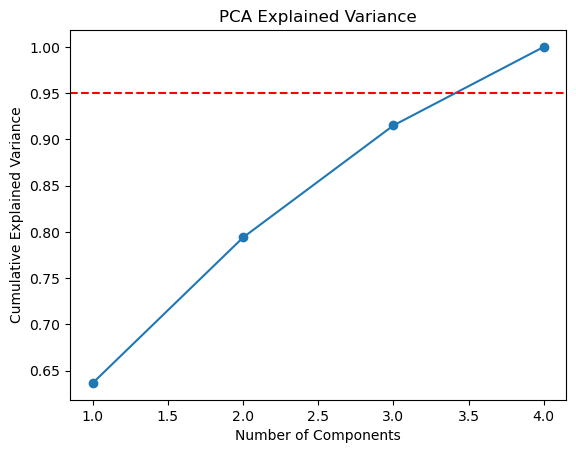

In [7]:
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker = "o")
plt.axhline(y = 0.95, color = "r", linestyle = "--")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA Explained Variance")
plt.show()